# **Retail Data Exploration : Extracting Actionable Insights with Python**

In this project, we will dive into the fascinating world of retail analytics using the power of Python. Our dataset for this project is the Online Retail II dataset, which is an open-source dataset available on Kaggle. This dataset encompasses the transactions of a UK-based and registered non-store online retailer between 01/12/2009 and 09/12/2011.

Throughout this project, we will employ various analytical techniques and Python libraries to conduct a comprehensive analysis of the retail data. We will start with simple exploratory analysis, such as identifying the most profitable products and determining the top customers. Additionally, we will delve into advanced analytics methods like cohort analysis and customer segmentation to gain a deeper understanding of customer behavior and preferences.

Objective :
- Cohort Analysis
- Detect Sales Seasonality

## **Import Libraries and Data**

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [48]:
## Ingest data from csv file
df = pd.read_csv('online_retail_II.csv')

## **Data Preparation**

### **Data Cleaning : Data Type and Null Values**

In this process we will check data type for each columns and handling missing values in our dataset.

Data types provide information about the nature of the variables in a dataset, such as numeric, categorical, or date/time. By examining the dtypes, we can identify any inconsistencies or incorrect data types, which may require conversion or manipulation.

Additionally, dealing with null values is essential for accurate data analysis. Null values represent missing or unknown data points within a dataset. During data cleaning, we need to identify null values, assess their impact, and decide on appropriate strategies to handle them, such as imputation or removal.


In [49]:
## Check data types for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 18 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1067371 non-null  int64  
 1   Invoice        1067371 non-null  object 
 2   StockCode      1067371 non-null  object 
 3   Description    1062989 non-null  object 
 4   Quantity       1067371 non-null  int64  
 5   InvoiceDate    1067371 non-null  object 
 6   Price          1067371 non-null  float64
 7   Customer ID    824364 non-null   float64
 8   Country        1067371 non-null  object 
 9   date           1067371 non-null  object 
 10  day_name       1067371 non-null  object 
 11  year           1067371 non-null  int64  
 12  month          1067371 non-null  int64  
 13  day            1067371 non-null  int64  
 14  month_year     1067371 non-null  object 
 15  total_value    1067371 non-null  float64
 16  first_trx      1067371 non-null  object 
 17  cohort_p

In [50]:
## Change InvoiceDate data type to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## Chage Customer ID data type to string
df['Customer ID'] = df['Customer ID'].astype(str)

### **Data Enrichment**

Data enrichment is a process in data analytics that involves enhancing or expanding existing datasets with additional information to provide a more comprehensive and valuable understanding of the data


In [51]:
## Extract Date Component
df['date'] = df['InvoiceDate'].dt.date
df['day_name'] = df['InvoiceDate'].dt.day_name()
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
df['day'] = df['InvoiceDate'].dt.day
df['month_year'] = df['InvoiceDate'].dt.to_period('M')

## Create Total_Value Columns
df['total_value'] = df['Quantity']*df['Price']

## **Basic Data Exploration**

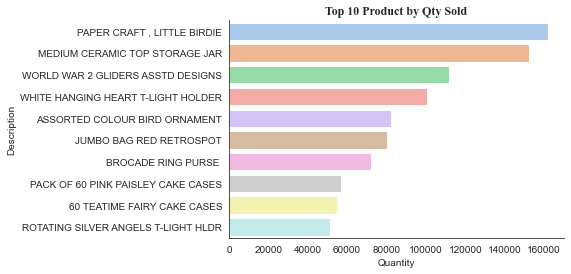

In [52]:
temp = df.groupby(by=['Description'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

plt.title('Top 10 Product by Qty Sold',
          fontname="Times New Roman",
          fontweight="bold")

sns.set_style('whitegrid')

sns.barplot(data=temp,
            y='Description',
            x='Quantity',
            palette='pastel')

sns.despine()


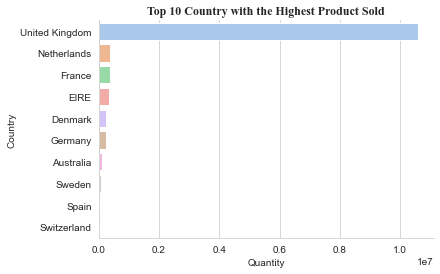

In [53]:
temp = df.groupby(by=['Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

plt.title('Top 10 Country with the Highest Product Sold',
          fontname="Times New Roman",
          fontweight="bold")

sns.set_style('whitegrid')

sns.barplot(data=temp,
            y='Country',
            x='Quantity',
            palette='pastel')

sns.despine()


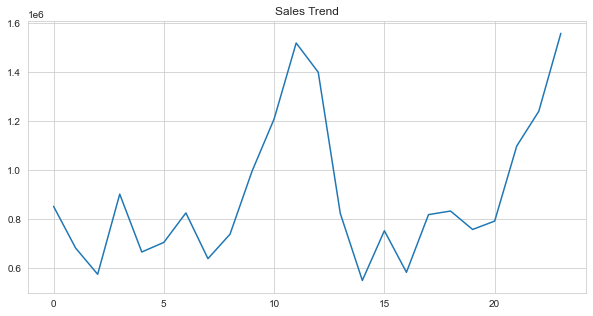

In [54]:
temp = df.groupby(by=['month_year'], as_index=False)['total_value'].sum()
temp = temp[~(temp['month_year']=='2011-12')]

plt.figure(figsize=(10,5))
y = temp['total_value']
plt.plot(y)
plt.title('Sales Trend')
None

##  **Sales Seasonality**

Sales seasonality refers to the recurring pattern in sales performance that occur during specific period of time, such as weekly, monthly, or years.

Understanding sales seasonality is important for several reason :

- Planning

- Marketing

- Financial Management.

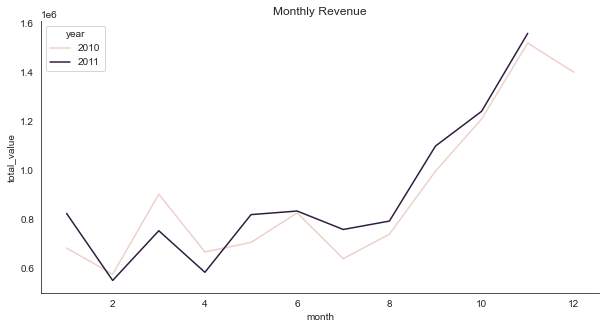

In [55]:
## Prepare Data
temp = df.groupby(by=['month','year'], as_index=False)['total_value'].sum()

## Drop Sales data on 12-2011 because it's not completed yet
temp.drop(labels=[22, 24], axis=0, inplace=True)

## Create Plot
plt.figure(figsize=(10,5))
sns.set_style('white')
g = sns.lineplot(data=temp, x='month', y='total_value', hue='year')
sns.despine()

plt.title('Monthly Revenue')
None


From the graph above, we can see a clear pattern in our data: revenue tends to increase towards the end of the year, starting from August to November.

By analyzing the sales seasonality trends, we can identify the factors contributing to this pattern and leverage them to our advantage. This information allows us to allocate resources and plan marketing campaigns strategically, ensuring maximum impact during the high-demand period.

Text(0.5, 1.0, 'Revenue Monthly Pattern')

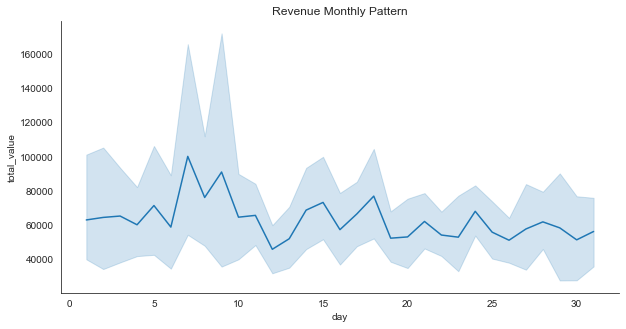

In [56]:
## Prepare Data
temp = df.groupby(by=['day','month'], as_index=False)['total_value'].sum()

## Creating Chart
plt.figure(figsize=(10,5))

sns.set_style('white')
sns.lineplot(data=temp, x='day', y='total_value')
sns.despine()

plt.title('Revenue Monthly Pattern')

## **Cohort Analysis**

Cohort analysis is a powerful analytical technique that involves grouping customers or users based on a shared characteristic or behavior and analyzing their behaviors and metrics over time. 

In [57]:
## Get First Transaction Date for Each Customer
first_trx = df.groupby(by=['Customer ID'], as_index=False)['date'].min()
first_trx['date'] = pd.to_datetime(first_trx.date)
first_trx['period'] = first_trx.date.dt.to_period('M')

## Create Mapping for User and it's First Trx
first_users_mapping = dict(zip(first_trx['Customer ID'], first_trx['period']))

## Join Table
df['first_trx'] = df['Customer ID'].map(first_users_mapping)

## Calculate Cohort Period by Subtracting Trx Period and First Trx Period
df['cohort_period'] = (pd.to_datetime(df.date).dt.to_period('M') - df.first_trx).apply(lambda x : x.n)

In [113]:
## Calculating number of transacting users from each pair of first_trx & period
temp = df.groupby(by=['Customer ID', 'first_trx', 'cohort_period'], as_index=False).agg({'Quantity':'sum', 'total_value':'sum'})
temp = temp.groupby(by=['first_trx','cohort_period'], as_index=False)['Customer ID'].count()

mapping = temp[temp.cohort_period==0]
mapping = dict(zip(mapping['first_trx'], mapping['Customer ID']))

temp['crr'] = round(temp['Customer ID']/temp['first_trx'].map(mapping)*100,0)

In [137]:
temp = temp[temp.cohort_period<=12].sort_values(by=['first_trx'], ascending=False)

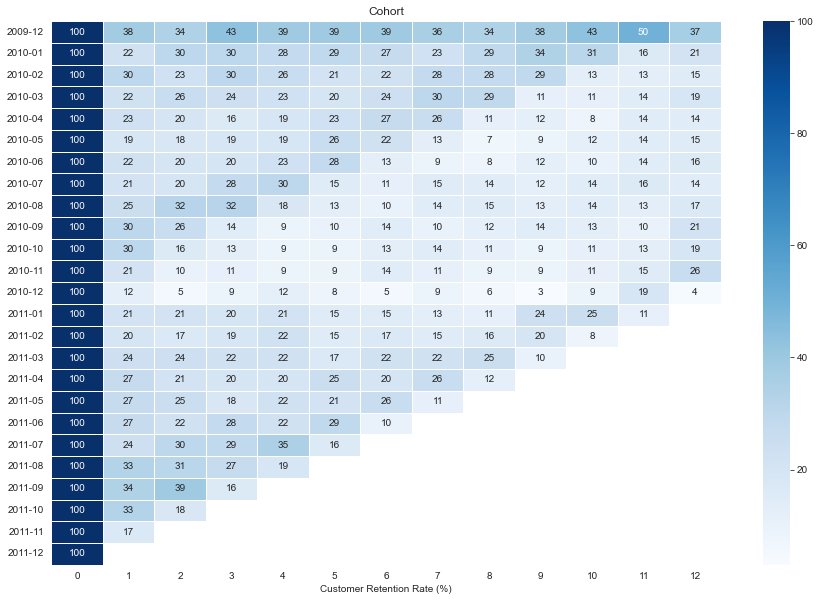

In [151]:
## Ploting Cohort Result
plt.figure(figsize=(15,10))

g = sns.heatmap(data=temp.pivot(index='first_trx', columns='cohort_period', values='crr'),
                annot=True,
                fmt=".0f",
                cmap='Blues',
                linewidths=0.5)

g.set(xlabel='Customer Retention Rate (%)', ylabel='', title='Cohort')
None

**Key Points :**
- The Cohort Analysis revealed that the retention rate of the initial cohort after 1 month was around 12-38 %. This unstable retention rate indicating a need to for improved customer engagement strategies.
- Customer from Aug - Oct 2011 exhibited a higher retention rate compared to other cohort period, demonstrating the effectiveness of our marketing effort during that period.